# Linear Shooting 
Note: refer slides

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# y'' = f(x,y,yp)
def f(x,y,yp):
    # here yp = y'
    return x*yp - y

In [11]:
def rk4_coupled_oscillator_1_step(f,t, y1_0, y2_0, h):
    # modified to do one step

    y1, y2 = y1_0, y2_0


    # Calculate k and l coefficients for y1 and y2 respectively
    k1 = h * y2
    l1 = h * f(t, y1, y2)

    k2 = h * (y2 + 0.5 * l1)
    l2 = h * f(t + 0.5 * h, y1 + 0.5 * k1, y2 + 0.5 * l1)

    k3 = h * (y2 + 0.5 * l2)
    l3 = h * f(t + 0.5 * h, y1 + 0.5 * k2, y2 + 0.5 * l2)

    k4 = h * (y2 + l3)
    l4 = h * f(t + h, y1 + k3, y2 + l3)

    # Update y1 and y2
    y1 = y1 + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    y2 = y2 + (l1 + 2*l2 + 2*l3 + l4) / 6.0

    y_points = [y1, y2]

    return y_points

In [12]:
def integrate_ivp(x0,y0,yp0, x_end, h):
    y1, y2 = y0, yp0
    # use for loop for RK4 steps
    x_points = np.arange(x0,x_end,h)
    for i in x_points:
        y1, y2 = rk4_coupled_oscillator_1_step(f, i, y1,y2,h)
    return y1,y2

In [23]:
x0 = 0
x_end = 2
y0 = 2
y_end = 0
# Choosing random slopes
s0 = 0
s1 = 1
# step size
h = 0.05

In [24]:
y0_end, _ = integrate_ivp(x0, y0, s0, x_end, 0.05)
y1_end, _ = integrate_ivp(x0, y0, s1, x_end, 0.05)

In [25]:
lmbda = (y_end - y1_end)/ (y0_end - y1_end)

In [26]:
lmbda

-1.0687589953135888

#### Solve for y(0.45) ?

In [27]:
x_end = 0.45
y0_end, _ = integrate_ivp(x0, y0, s0, x_end, h)
y1_end, _ = integrate_ivp(x0, y0, s1, x_end, h)
y_end = lmbda * y0_end + (1-lmbda) * y1_end
print(y_end)

2.7249538989967026


---

# Non Linear shooting using secant
Note : use previously defined rk4_1step, integrate_ivp

In [37]:
def f(x,y,yp):
    return y*np.sin(y)

In [38]:
x0 = 0
x_end = 2
y0 = 0
y_end = 5
# Choosing random slopes
s0 = 0
s1 = 1
# step size
h = 0.1

In [43]:
s_prev = s0
s_curr = s1
max_iter = 1000
s_values = [] # The slopes we are trying to estimate
Es_values = [] # The difference at the boundary

In [44]:
for i in range(5):
    # Integrate IVP with s_prev and s_curr
    y_end_prev, _ = integrate_ivp(x0, y0, s_prev, x_end, h)
    y_end_curr, _ = integrate_ivp(x0, y0, s_curr, x_end, h)
    # Compute boundary errors
    E_prev = y_end_prev - y_end
    E_curr = y_end_curr - y_end

    # Secant update for new slope
    s_new = s_curr - E_curr * (s_curr - s_prev)/(E_curr - E_prev)
    # check difference : E(s_new)
    y_end_new, _ = integrate_ivp(x0, y0, s_new, x_end, h)
    E_new = y_end_new - y_end

    # Adding to table
    s_values.append(s_new)
    Es_values.append(E_new)
    # Update slopes
    s_prev, s_curr = s_curr, s_new

In [46]:
print("Updated slope: ", s_values[-1])
print("Final error", Es_values[-1])

Updated slope:  2.2392665614476144
Final error -0.0006044600069037287


In [48]:
for i in range(len(s_values)):
    print(s_values[i], Es_values[i])

1.6034932414804766 -0.5732341027524308
1.8678596184103644 -0.27845454464983366
2.117585276398891 -0.08050124110518819
2.2191406687258097 -0.013314778372092384
2.2392665614476144 -0.0006044600069037287


## 2D Laplace Equation: Gauss-Seidel Method

**Problem:** Solve

$$
\nabla^2 u(x, y) = 0, \quad 0 \le x \le 1, \ 0 \le y \le 1
$$

with boundary conditions:

$$
u(x, 0) = 0, \ u(x, 1) = 0, \ u(0, y) = 2, \ u(1, y) = 2
$$

## Tasks / Key Steps

1. Discretize the domain on a $100 \times 100$ grid.
2. Apply the **Gauss–Seidel iteration**:
   $$
   u_{i,j}^{\text{new}} = \frac{1}{4} \left( u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \right)
   $$
3. Iterate until the maximum change in $u$ is below $10^{-3}$.
4. Plot the potential as a heatmap using `matplotlib`.

In [5]:
tolerance = 1e-3
n = 100
max_iter = 100

In [6]:
# Initialize u and apply boundaries
u = np.zeros((n+1,n+1))
u[:, -1] = 0 # top
u[:, 0] = 0 # bottom
u[0, :] = 2 # left
u[-1, :] = 2 # right


# Gauss-Seidel iteration
for it in range(max_iter):
    error = 0
    for i in range(1, n):
        for j in range(1, n):
            old = u[i,j]
            u[i,j] = 0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]) # Gauss seidel formula
            error = max(error, abs(u[i,j]-old))
    if error < tolerance:
        break

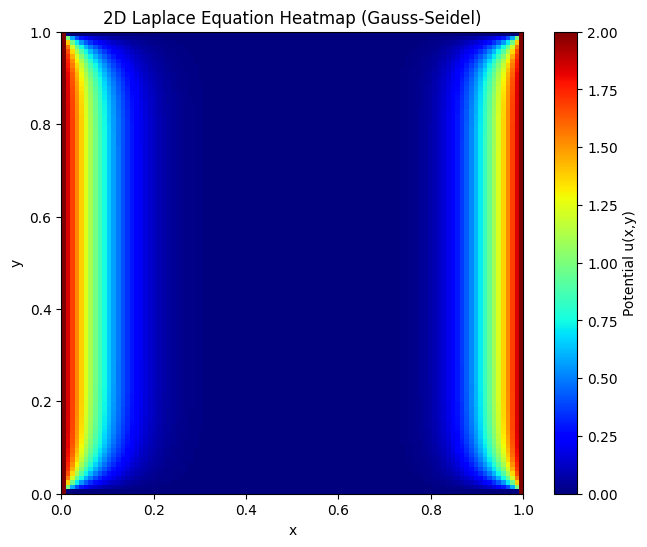

In [8]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))

# We use u.T (transpose) because your loops used u[x, y] format, 
# but imshow expects u[row, col] (which is effectively u[y, x])
plt.imshow(u.T, cmap='jet', origin='lower', extent=[0, 1, 0, 1])

plt.colorbar(label='Potential u(x,y)')
plt.title('2D Laplace Equation Heatmap (Gauss-Seidel)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()